# Libraries

In [2]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import yfinance as yf
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Downloading the data

In [3]:
df = yf.download("^NSEI",start="2000-01-01",end="2022-12-31")

[*********************100%***********************]  1 of 1 completed


In [4]:
df2 =df.drop(["Adj Close","Volume"],axis=1)

In [5]:
df2.describe()

,Open,High,Low,Close
count,3747.000000,3747.000000,3747.000000,3747.000000
mean,8664.117869,8714.986526,8599.078964,8658.315827
std,3968.588767,3978.721696,3950.086069,3965.463346
min,2553.600098,2585.300049,2252.750000,2524.199951
25%,5439.349854,5482.474854,5394.150146,5436.350098
50%,7971.500000,8021.600098,7927.049805,7964.799805
75%,10875.075195,10925.725098,10806.000000,10859.300293
max,18871.949219,18887.599609,18778.199219,18812.500000


In [6]:
df2.count()

Open     3747
High     3747
Low      3747
Close    3747
dtype: int64

In [7]:
df2.dropna(inplace=True)

In [8]:
df2.count()

Open     3747
High     3747
Low      3747
Close    3747
dtype: int64

In [9]:
df2["50ma"] = df2["Close"].rolling(50).mean()

In [10]:
df2["100ma"] = df2["Close"].rolling(100).mean()

In [11]:
df2.head()

,Open,High,Low,Close,50ma,100ma
Date,,,,,,
2007-09-17,4518.450195,4549.049805,4482.850098,4494.649902,NaN,NaN
2007-09-18,4494.100098,4551.799805,4481.549805,4546.200195,NaN,NaN
2007-09-19,4550.250000,4739.000000,4550.250000,4732.350098,NaN,NaN
2007-09-20,4734.850098,4760.850098,4721.149902,4747.549805,NaN,NaN
2007-09-21,4752.950195,4855.700195,4733.700195,4837.549805,NaN,NaN


In [12]:
df2.tail()

,Open,High,Low,Close,50ma,100ma
Date,,,,,,
2022-12-26,17830.400391,18084.099609,17774.250000,18014.599609,18200.374961,17847.579492
2022-12-27,18089.800781,18149.250000,17967.449219,18132.300781,18219.306992,17855.501992
2022-12-28,18084.750000,18173.099609,18068.349609,18122.500000,18235.520977,17863.272500
2022-12-29,18045.699219,18229.699219,17992.800781,18191.000000,18249.601992,17871.300996
2022-12-30,18259.099609,18265.250000,18080.300781,18105.300781,18261.463008,17878.534004


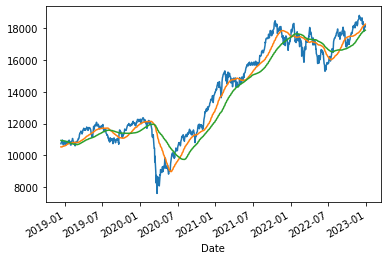

In [13]:
df2["Close"][-1000:].plot();
df2["50ma"][-1000:].plot();
df2["100ma"][-1000:].plot();

In [14]:
df2.dropna(inplace=True)

In [15]:
df2.head()

,Open,High,Low,Close,50ma,100ma
Date,,,,,,
2008-02-07,5322.549805,5344.600098,5113.850098,5133.250000,5788.787998,5614.672495
2008-02-08,5132.100098,5173.850098,5034.250000,5120.350098,5778.844004,5620.929497
2008-02-11,5120.549805,5126.399902,4803.600098,4857.000000,5763.292002,5624.037495
2008-02-12,4877.850098,4949.600098,4820.450195,4838.250000,5744.802002,5625.096494
2008-02-13,4836.549805,4986.549805,4836.549805,4929.450195,5726.091006,5626.915498


In [16]:
position =0

trades = 0

buy_prices = []

sell_prices = []

returns = []

for i in df2.index:
    condition_1 = (df2["50ma"][i] > df2["100ma"][i])
    condition_2 = (df2["50ma"][i] < df2["100ma"][i])
    close = df2["Close"][i]
    
    if condition_1 == True:
        print("Already Long")
        if position == 0:
            buy_price = close
            position = 1
            buy_prices.append(buy_price)
            print("Fresh Long at", buy_price)
            
    elif condition_2 == True:
        print("exited")
        if position == 1:
            sell_price = close
            position = 0
            returns.append(((sell_price/buy_price)-1)*100)
            sell_prices.append(sell_price)
            print("Exited the Long Position at", sell_price)
            
print(returns)

Already Long
Fresh Long at 5133.25
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
exited
Exited the Long Position at 5191.7998046875
exited
exited
exited
exited
exited
exited
exited
exited
exited
exited
exited
exited
exited
exited
exited
exited
exited
exited
exited
exited
exited
exited
exited
exited
exited
exited
exited
exited
exited
exited
exited
exited
exited
exited
exited
exited
exited
exited
exited
exited
exited
exited
exited
exited
exited
exited
exited
exited
exited
exited
exited
exited
exited
exited
exited
exited
exited
exited
exited
exited
exited
exited
exited
exited
exited
exited
exited
exited
exited
exited
exited
exited
exited
exited
exited
exited
exited
exited
exited
exited
exited
exited
exited
exited
exited
exited
exited
exited
exited
exited
exited
exited
exited
exited
exited
exited
exited
exited
exited
exited
exited
exited
exited
exited
exited
exited
exited
exited
exited
exited
exited
exited
exited
exited

Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
exited
Exited the Long Position at 5574.75
exited
exited
exited
exited
exited
exited
exited
exited
exited
exited
exited
exited
exited
exited
exited
exited
exited
exited
exited
exited
exited
exited
exited
exited
exited
exited
exited
exited
exited
exited
exited
exited
exited
exited
exited
exited
exited
exited
exited
exited
exited
exited
exited
exited
exited
Already Long
Fresh Long at 5760.2001953125
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
A

Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long

Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long
Already Long

In [17]:
returns = pd.DataFrame(returns)

In [18]:
returns

,0
0,1.140599
1,55.513503
2,0.373855
3,5.818386
4,2.159129
5,-9.075738
6,4.460618
7,-4.185620
8,32.815987
9,-7.137294


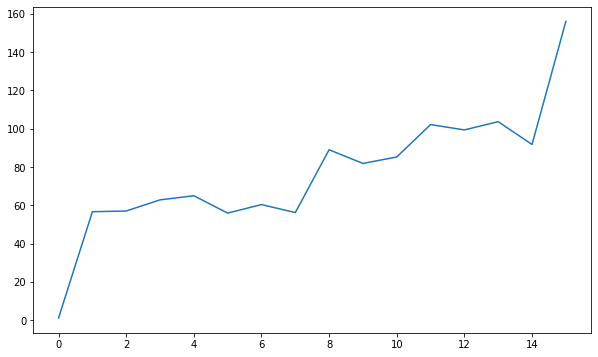

In [19]:
returns[0].cumsum().plot(figsize=(10,6));